In [1]:
###################################################################
def FFGN():
    B = 2
    a = 6
    θ = 0.4
    T = 1
    n = 1
    
    #decay rates
    def u():   
        return a * pow(B, -n)

    #uncorrelated uniformly deviates
    def r():
        return pow(e, -u())

    #uncorrelated uniformly distributed noise   ？：取值范围如何界定，为什么
    uu_noise = np.random.uniform(0,1,T)

    #weight function
    def W():       
        return np.sqrt((12 * (1 - r()**2) * (pow(B,0.5-θ) - pow(B,θ-0.5)) * pow(a * pow(B,-n), 1-2*θ)) / math.gamma(2-2*θ))

    #auxiliary functions 辅助方程，不知道什么意思
    def X():
                                    # The current time
        if T == 1:
            x1 = (uu_noise - 0.5) / np.sqrt(1 - r()**2)               
        elif T > 1:
            x1 = r() * X() + (uu_noise - 0.5)
        return x1

    N = 20
    #desired correlation noise
    def η():
        for n in range(1,N):
            x = W() * X()
        return x
    def η1():
        if η() >= 0:
            return 1
        elif η() < 0:
            return 0
    return η1()
#########################################################################

In [5]:
import math
def Len(L,t):
    i=1
    l=0
    for i in range(0,n):
        len_1 = math.sqrt((x[i]-x_first)**2+(y[i]-y_first)**2)
        len_a += (len_1-np.average(len_1))**2
        print(np.average(len_1))
        i += 1
    return (math.sqrt(len_a/n))
Len(128,2000)
        
        

NameError: name 'x' is not defined

first point
[96, 74]
-----------
iterations
2000


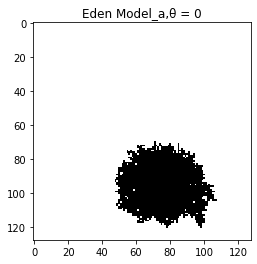

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import random
from math import e
#When will we consider that the simulation has ended?
#When all the positions in the colony have been occupied?

L = 128
axes = plt.gca()


colony = np.ones((L,L), dtype = int)
col_coord = np.array([[(i, j) for j in range(L)] for i in range(L)])

#define a set of active sites, avoiding multiple instances of the same active site. This set will initialy be empty:
active_coord = set()

#Add the first active position:
x_first = np.random.randint(0,L)
y_first = np.random.randint(0,L)
active_coord.add((x_first,y_first))
colony[x_first,y_first] = 0 

def func_veins(coord, LL):    #计算相邻位置
    veins_coord =[]
    if coord[1] + 1 <= LL - 1:
        veins_coord.append((coord[0],coord[1]+1))
    if coord[1] - 1 >= 0:
        veins_coord.append((coord[0],coord[1]-1))
    if coord[0] - 1 >= 0:
        veins_coord.append((coord[0]-1,coord[1]))
    if coord[0] + 1 <= LL-1:
        veins_coord.append((coord[0]+1,coord[1]))
    return veins_coord


n = 0 
while n < 2000:                                           #Main loop of Eden model
    #We must save the unoccupied positions of the neighbors of the active positions in a list.
    #To do this we first simply calculate the neighboring positions of the active positions
    veins = []                                           #initialize
    for i in range(len(active_coord)):
        one_active_coord = list(active_coord)[i]
        veins_function = func_veins(one_active_coord,L)
        veins = veins + veins_function
    veins = list(set(tuple(x) for x in veins))
    inact_veins = [veins[j] for j in range(len(veins)) if colony[veins[j]] == 1]#delete occupied data grid points
    inact_veins = set(inact_veins)
    new_active = random.sample(inact_veins,1)[0]         #select a random coordinate of these neighbors 
    colony[new_active] = 0                              #occupy it
    active_coord.add(new_active)
    n = n + 1

print('first point')
print([x_first,y_first])
print('-----------')
print('iterations')
print(n)

plt.title('Eden Model_a,θ = 0')
plt.imshow(colony, interpolation="none", cmap="gray")

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import random
#When will we consider that the simulation has ended?
#When all the positions in the colony have been occupied?

L = 40
axes = plt.gca()
axes.set_xlim(0,L)
axes.set_ylim(0,L)

colony = np.ones((L,L), dtype = int)
col_coord = np.array([[(i, j) for j in range(L)] for i in range(L)])

#define a set of active sites, avoiding multiple instances of the same active site. This set will initialy be empty:
active_coord = set()

#Add the first active position:
x_first = np.random.randint(0,L)
y_first = np.random.randint(0,L)
active_coord.add((x_first,y_first))
colony[x_first,y_first] = 0 

def func_veins(coord, LL):    #计算相邻位置
    veins_coord =[]
    if coord[1] + 1 <= LL - 1:
        veins_coord.append((coord[0],coord[1]+1))
    if coord[1] - 1 >= 0:
        veins_coord.append((coord[0],coord[1]-1))
    if coord[0] - 1 >= 0:
        veins_coord.append((coord[0]-1,coord[1]))
    if coord[0] + 1 <= LL-1:
        veins_coord.append((coord[0]+1,coord[1]))
    return veins_coord


n = 1 
while n < 500:                                           #Main loop of Eden model
    #We must save the unoccupied positions of the neighbors of the active positions in a list.
    #To do this we first simply calculate the neighboring positions of the active positions
    veins = []                                           #initialize
    for i in range(len(active_coord)):
        one_active_coord = list(active_coord)[i]
        veins_function = func_veins(one_active_coord,L)
        veins = veins + veins_function
    veins = list(set(tuple(x) for x in veins))
    inact_veins = [veins[j] for j in range(len(veins)) if colony[veins[j]] == 1]#delete occupied data grid points
    inact_veins = set(inact_veins)
    new_active = random.sample(inact_veins,1)[0]         #select a random coordinate of these neighbors 
    colony[new_active] = 0                               #occupy it
    active_coord.add(new_active)
    n = n + 1

print('first point')
print([x_first,y_first])
print('-----------')
print('iterations')
print(n)

plt.title('Eden Model_a')
plt.imshow(colony, interpolation="none", cmap="gray")

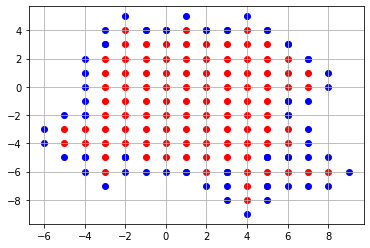

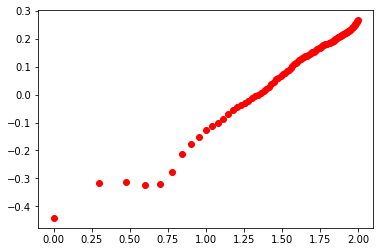

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

def d(x,y):
    r = pow(x**2 + y**2, 0.5)
    return r

plt.figure()

t=100     # 设定时间步长

point = np.array([[0,0]])
step = np.array([[0,1],[0,-1],[1,0],[-1,0]])
edge = step

dis=[]
dis = np.array(dis)
wt = []
for i in range(0,t):
    growsite = rd.randint(0,len(edge)-1)
    point = np.append(point,np.array([edge[growsite]]),axis=0)
    edge = np.append(edge,np.array([edge[growsite]]) + step,axis=0)
    j=0
    for m in edge:
        for n in point:
            if m[0]==n[0] and m[1]==n[1]:
                edge = np.delete(edge,j,axis=0)
                j=j-1
        j=j+1
    # print(i)
    for j in edge:
        dis = np.append(dis,d(j[0], j[1]))
    w = np.std(dis)
    wt.append(w)
wt = np.array(wt)

plt.scatter(edge[:,0],edge[:,1],c='b')
plt.scatter(point[:,0],point[:,1],c='r')
plt.grid(True)
plt.figure()
plt.scatter(np.log10(np.arange(1,len(wt)+1)),np.log10(np.array(wt)),c='r')
plt.show()

β = 0.3756537272820365


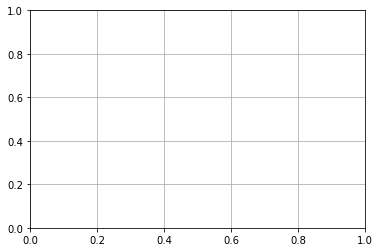

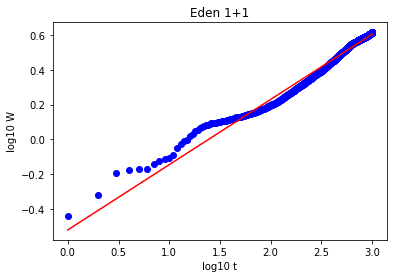

In [4]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

def d(x,y):
    r = pow(x**2 + y**2, 0.5)
    return r

plt.figure()

t=1000     # 设定时间步长

point = np.array([[0,0]])
step = np.array([[0,1],[0,-1],[1,0],[-1,0]])
edge = step

dis=[]
dis = np.array(dis)
wt = []
for i in range(0,t):
    growsite = rd.randint(0,len(edge)-1)
    point = np.append(point,np.array([edge[growsite]]),axis=0)
    edge = np.append(edge,np.array([edge[growsite]]) + step,axis=0)
    j=0
    for m in edge:
        for n in point:
            if m[0]==n[0] and m[1]==n[1]:
                edge = np.delete(edge,j,axis=0)
                j=j-1
        j=j+1
    # print(i)
    for j in edge:
        dis = np.append(dis,d(j[0], j[1]))
    w = np.std(dis)
    wt.append(w)
wt = np.array(wt)

plt.grid(True)
plt.figure()
plt.scatter(np.log10(np.arange(1,len(wt)+1)),np.log10(np.array(wt)),c='blue', label='OD')
x=np.log10(np.arange(1,len(wt)+1))
y=np.log10(np.array(wt))
res = stats.linregress(x, y)
plt.plot(x, res.intercept + res.slope*x, color='r', label='fitted line',)
print('β =',res.slope) 
plt.title('Eden 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()